# **Import Library**

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px
import glob
from scipy import stats

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# **Import Dataset**

In [2]:
df = pd.read_csv('train_prototipe_2.csv')

df.sample(10)


,Cost,Purchases,Importance,Discount,Weight (gram),Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Reorder_purchases
1025,0.397196,0.000000,0,0.450000,0.265011,1.0,0,0,0,1,0,1,0,0,0
7444,0.878505,0.333333,0,0.100000,0.022206,0.0,0,0,0,0,1,0,0,1,1
5006,0.710280,0.166667,0,0.000000,0.613148,0.0,0,1,0,0,0,0,0,1,1
4549,0.883178,0.333333,1,0.150000,0.062381,0.0,0,0,0,1,0,0,0,1,1
412,0.724299,0.000000,2,0.366667,0.208181,1.0,1,0,0,0,0,0,0,1,0
5750,0.158879,0.333333,1,0.000000,0.127977,0.0,0,0,0,0,1,1,0,0,1
2879,0.462617,0.166667,1,0.766667,0.210080,1.0,0,0,1,0,0,0,0,1,1
2792,0.537383,0.000000,0,0.633333,0.221914,1.0,0,0,1,0,0,1,0,0,0
7021,0.542056,0.000000,1,0.100000,0.587436,0.0,0,0,1,0,0,0,0,1,0
4399,0.728972,0.000000,1,0.083333,0.644704,0.0,1,0,0,0,0,1,0,0,0


# **Stage 3**

## **Modelling**

### **Function**

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(model):
    y_pred = model.predict_proba(x_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0,1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0,1], [0,1], 'k--' )
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [94]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_threshold_point(model, threshold_value):
    y_pred = model.predict_proba(x_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 4))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0,1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    
    # Menandai threshold value
    idx = np.argmin(np.abs(threshold - threshold_value))
    plt.scatter(fpr[idx], tpr[idx], c='red', s=70, label=f'Threshold {threshold_value}')
    
    # garis putus-putus dari titik threshold ke sumbu TPR dan FPR
    plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', linewidth=1)
    plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', linewidth=1)
    

    plt.plot([0,1], [0,1], 'k--' )
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()

In [95]:
def plot_feature_importances(model):
    import pandas as pd
    import matplotlib.pyplot as plt

    # feature importances
    feature_importances = pd.DataFrame({
        'feature': x_train.columns,
        'importance': model.feature_importances_
    })

    
    feature_importances = feature_importances.reset_index(drop=True)

    # Group by
    fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending=False)[:20][::-1]

    # Plot
    plt.figure(figsize=(6, 5))
    fi.plot(kind='barh')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top Feature Importances - {model}')
    plt.show()

# Contoh pemanggilan
# plot_feature_importances(best_model_xgb)


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # k-fold cross validation
  score = cross_validate(model, x, y, cv=5, scoring='r2', return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  print('r2 (cross-val train): ' + str(score['train_score'].mean()))

#contoh pemanggilan
#eval_regression(regressor)

In [97]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    # Evaluation Metrics
    print(f'model {model}')
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("ROC AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("ROC AUC (Train Set): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

   
    # Cross-validation
    score = cross_validate(model, x_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('\nRecall (Cross-validation Train): %.2f' % score['train_score'].mean())
    print('Recall (Cross-validation Test): %.2f' % score['test_score'].mean())
    
    # Confusion Matrix
    print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred))

def show_best_hyperparameter(model):
    if hasattr(model, 'best_estimator_'):
        print(model.best_estimator_.get_params())
    else:
        print("The model is not a GridSearchCV or RandomizedSearchCV instance.")

# Example usage
# Assuming x_train, x_test, y_train, y_test are already defined
#model = RandomForestClassifier(random_state=42)
#model.fit(x_train, y_train.values.ravel())

#eval_classification(model)
#show_feature_importance(model)

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model):
    
    y_pred = model.predict(x_test)
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def draw_learning_curve(model_type, param_values):
    if model_type == 'LogisticRegression':
        model = LogisticRegression()
    elif model_type == 'KNeighborsClassifier':
        model = KNeighborsClassifier()
    elif model_type == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier()
    elif model_type == 'RandomForestClassifier':
        model = RandomForestClassifier()
    elif model_type == 'SVC':
        model = SVC(probability=True)
    else:
        raise ValueError("Invalid model type. Supported types are 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', and 'SVC'.")

    train_scores = []
    test_scores = []

    for param_value in param_values:
        if model_type == 'LogisticRegression':
            model.set_params(C=param_value)
        elif model_type == 'KNeighborsClassifier':
            model.set_params(n_neighbors=param_value)
        elif model_type == 'DecisionTreeClassifier':
            model.set_params(max_depth=param_value)
        elif model_type == 'RandomForestClassifier':
            model.set_params(n_estimators=param_value)
        elif model_type == 'SVC':
            model.set_params(C=param_value)

        model.fit(x_train, y_train)

        # eval train
        y_pred_train_proba = model.predict_proba(x_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(param_value) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter Value')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Tuning - ' + model_type)
    plt.legend()
    plt.show()

#contoh pemanggilan
#param_values_rf = [50, 100, 150, 200]
#draw_learning_curve('RandomForestClassifier', param_values_rf)

#param_values_svc = [0.1, 1, 10]
#draw_learning_curve('SVC', param_values_svc)


In [100]:
def optimal_threshold(model):
    model.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Filter thresholds kriteria TPR > 0.5 dan FPR > 0.05 serta < 0.15
    candidate_thresholds = thresholds[(tpr > 0.5) & (fpr > 0.05) & (fpr < 0.15)]

    optimal_threshold = candidate_thresholds[np.argmax(tpr[fpr > 0.05] - fpr[fpr > 0.05])]

    # Prediksi label menggunakan threshold yang dioptimalkan
    y_pred_optimal = (y_pred >= optimal_threshold).astype(int)

    # Precision, Recall, F1-score
    precision = precision_score(y_test, y_pred_optimal)
    recall = recall_score(y_test, y_pred_optimal)
    f1 = f1_score(y_test, y_pred_optimal)

    # True Positive Rate (TPR) & False Positive Rate (FPR)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_optimal).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    print(f'\nOptimal threshold {model}: {optimal_threshold:.2f}')
    print(f'\nPrecision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f'TPR: {tpr:.2f}')
    print(f'FPR: {fpr:.2f}')

In [101]:
def optimal_threshold_recall(model):
    model.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Filter thresholds kriteria TPR > 0.5 dan FPR > 0.05 serta < 0.15
    candidate_thresholds = thresholds[(tpr > 0.8) & (fpr > 0.1) & (fpr < 0.5)]

    optimal_threshold = candidate_thresholds[np.argmax(tpr[fpr > 0.1] - fpr[fpr > 0.1])]

    # Prediksi label menggunakan threshold yang dioptimalkan
    y_pred_optimal = (y_pred >= optimal_threshold).astype(int)

    # Precision, Recall, F1-score
    precision = precision_score(y_test, y_pred_optimal)
    recall = recall_score(y_test, y_pred_optimal)
    f1 = f1_score(y_test, y_pred_optimal)

    # True Positive Rate (TPR) & False Positive Rate (FPR)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_optimal).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    print(f'\nOptimal threshold {model}: {optimal_threshold:.2f}')
    print(f'\nPrecision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f'TPR: {tpr:.2f}')
    print(f'FPR: {fpr:.2f}')

In [102]:
import numpy as np
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

def set_roc_threshold(model, threshold):

    # Probability of model 
    y_probs = model.predict_proba(x_test)[:, 1]
    
    # Set threshold
    y_pred_new_threshold = (y_probs >= threshold).astype(int)

    # Model Eval
    conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)

    # Plot the confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [103]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, roc_curve, confusion_matrix

def table_threshold(model):

    y_probs = model.predict_proba(x_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)


    # Range nilai threshold
    desired_thresholds = np.arange(0.0, 1.1, 0.1)

    results = []

    # precision, recall, dan f-score 
    for threshold in desired_thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        results.append({
            'Threshold': threshold,
            'Precision': precision,
            'Recall': recall,
            'F-Score': fscore,
            'TPR': tpr,
            'FPR': fpr
        })

    df_results = pd.DataFrame(results)
    return df_results

### **Split Dataset**

In [29]:
x = df.drop(columns=['Late'])
y = df[['Late']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

In [25]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

train_ratio = len(x_train) / len(x)
test_ratio = len(x_test) / len(x)

print(f"Training set ratio: {train_ratio:.2f}")
print(f"Test set ratio: {test_ratio:.2f}")


x_train shape: (7449, 14)
x_test shape: (3193, 14)
y_train shape: (7449, 1)
y_test shape: (3193, 1)
Training set ratio: 0.70
Test set ratio: 0.30


### **Logistic Regression**

Accuracy (Test Set): 0.64
Precision (Test Set): 0.69
Recall (Test Set): 0.69
F1-Score (Test Set): 0.69
ROC AUC (Test Set): 0.72
ROC AUC (Train Set): 0.71

Recall (Cross-validation Train): 0.68
Recall (Cross-validation Test): 0.68

Confusion Matrix (Test Set):
 [[ 755  577]
 [ 583 1278]]


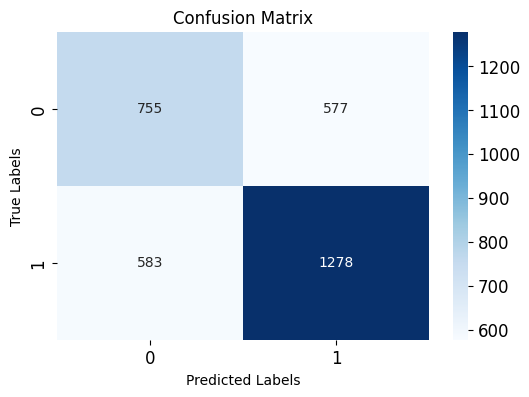

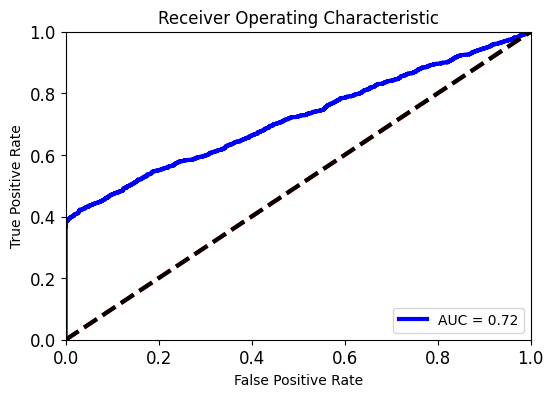

In [85]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

eval_classification(logreg)
plot_confusion_matrix(logreg)
plot_roc(logreg)

param value: 0.001; train: 0.713964186734779; test: 0.7152315629742033
param value: 0.01; train: 0.7176372924134353; test: 0.7214543247344462
param value: 0.1; train: 0.7154504511157389; test: 0.7201205867475973
param value: 1; train: 0.7116235347894772; test: 0.7165005563985838
param value: 10; train: 0.710616679250496; test: 0.7153901871522509
param value: 100; train: 0.7104898712481055; test: 0.7152493677288821


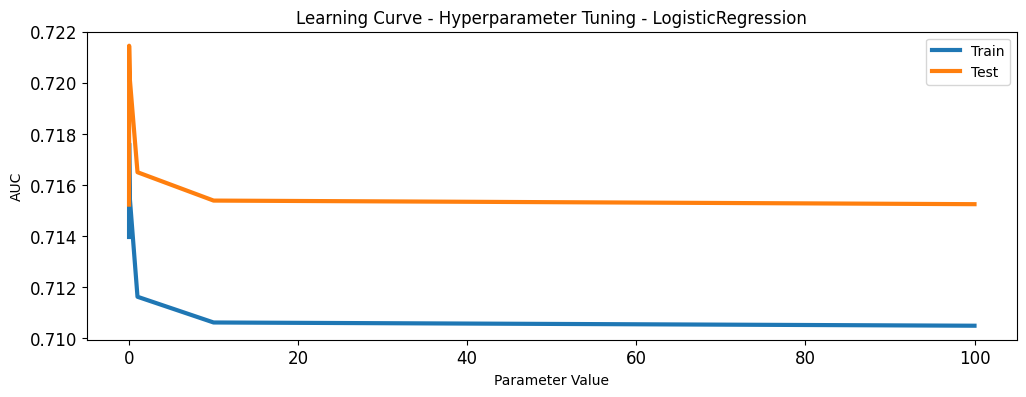

In [27]:
param_values_logreg = [0.001, 0.01, 0.1, 1, 10, 100]
draw_learning_curve('LogisticRegression', param_values_logreg)

- Tidak perlu hyperparameter tuning, karena nilai AUC cenderung stabil pada param value logistic regression

#### Set Threshold

In [105]:
optimal_threshold(logreg)


Optimal threshold LogisticRegression(): 0.59

Precision: 0.83
Recall: 0.50
F1-score: 0.63
TPR: 0.50
FPR: 0.14


In [104]:
table_threshold(logreg)

,Threshold,Precision,Recall,F-Score,TPR,FPR
0,0.0,0.582837,1.000000,0.736446,1.000000,1.000000
1,0.1,0.582837,1.000000,0.736446,1.000000,1.000000
2,0.2,0.582707,0.999463,0.736196,0.999463,1.000000
3,0.3,0.584870,0.988716,0.734971,0.988716,0.980480
4,0.4,0.611683,0.894680,0.726598,0.894680,0.793544
5,0.5,0.688949,0.686728,0.687836,0.686728,0.433183
6,0.6,0.844875,0.491671,0.621603,0.491671,0.126126
7,0.7,0.989116,0.390650,0.560092,0.390650,0.006006
8,0.8,1.000000,0.347125,0.515357,0.347125,0.000000
9,0.9,1.000000,0.281032,0.438758,0.281032,0.000000


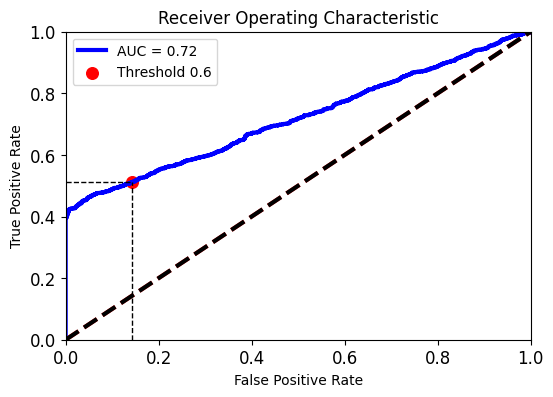

In [141]:
plot_roc_threshold_point(logreg, 0.6)

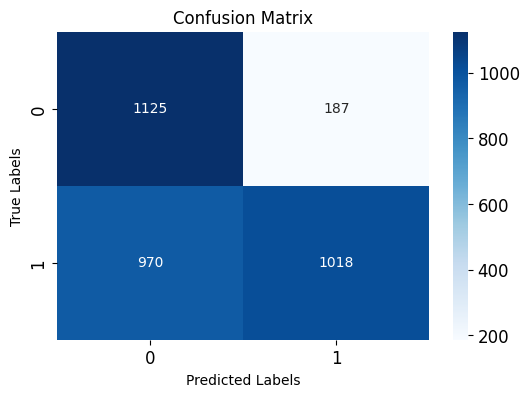

In [25]:
set_roc_threshold(logreg, 0.6)

- Kita dapat melihat bahwa pada setting threshold `0.6` TPR/Recall memiliki nilai `0.51` dan FPR  memiliki nilai `0.14`, sehingga dapat disimpulkan bahwa threshold `0.6` memberikan keseimbangan yang baik antara mendeteksi sebagian besar kasus late yang sebenarnya (Recall yang tinggi) dan mengurangi jumlah false alarms (FPR yang rendah), dengan tingkat precision `0.84`.
- Optimal Threshold telah ditentukan pada function dengan kategori `TPR` > 0.5, dan 0.05 < `FPR` < 0.15 
- Hal ini bertujuan tidak hanya untuk menyeimbangkan deteksi late namun juga tingkat biaya untuk ivestigasi false alarm (FPR)

### **Decision Tree**

Accuracy (Test Set): 0.64
Precision (Test Set): 0.69
Recall (Test Set): 0.71
F1-Score (Test Set): 0.70
ROC AUC (Test Set): 0.63
ROC AUC (Train Set): 1.00

Recall (Cross-validation Train): 1.00
Recall (Cross-validation Test): 0.70

Confusion Matrix (Test Set):
 [[ 735  597]
 [ 547 1314]]


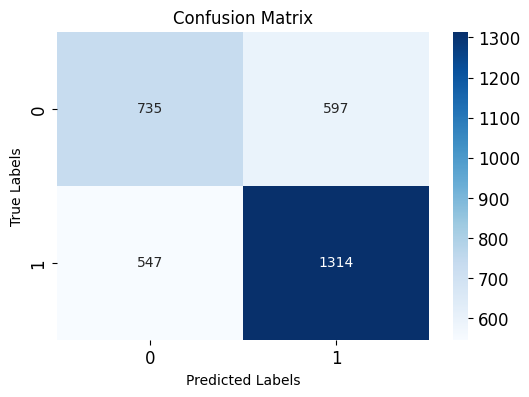

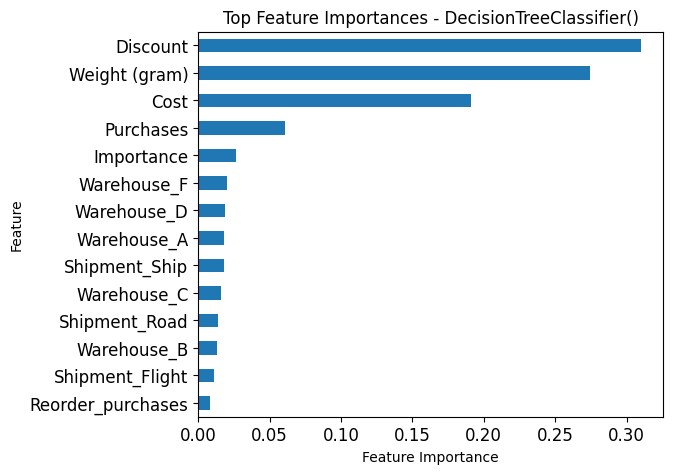

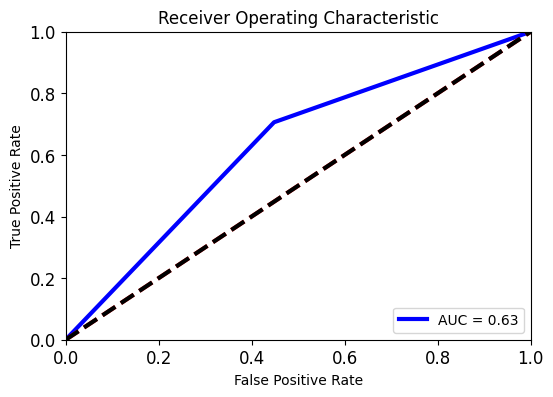

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
eval_classification(dt)
plot_confusion_matrix(dt)
plot_feature_importances(dt)
plot_roc(dt)

param value: 1; train: 0.6924903867903189; test: 0.6929070392262224
param value: 2; train: 0.7251758973100941; test: 0.7319335724762915
param value: 3; train: 0.7365589863677531; test: 0.7367061446185574
param value: 5; train: 0.7454549590237777; test: 0.7417802676400206
param value: 6; train: 0.7520153452792409; test: 0.7343118911496127
param value: 7; train: 0.7620702591241453; test: 0.7405627685719035


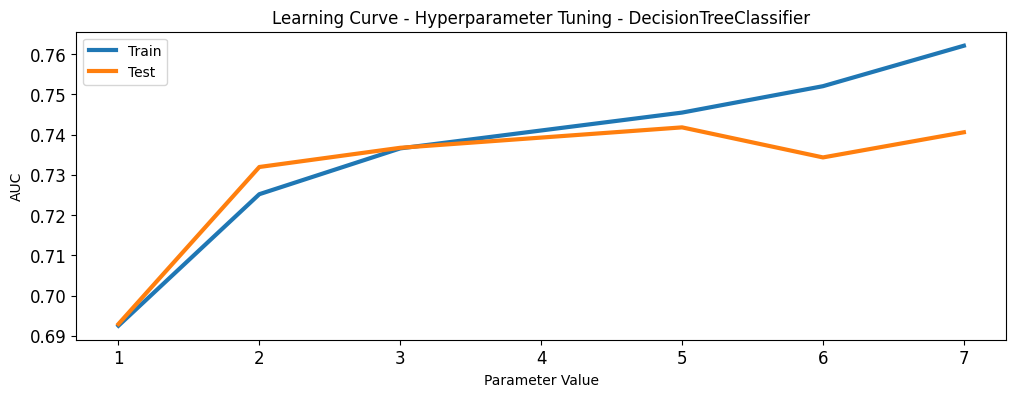

In [55]:
param_values_dt = [1, 2, 3, 5, 6, 7]
draw_learning_curve('DecisionTreeClassifier', param_values_dt)

#### **Hypertuning**

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Inisialisasi DecisionTreeClassifier
dt = DecisionTreeClassifier()

param_grid = {
    'ccp_alpha': [0],
    'class_weight': [None],
    'criterion': ['gini'],
    'max_depth': [79],
    'max_features': ['sqrt'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [83],
    'min_samples_split': [100],
    'min_weight_fraction_leaf': [0.0],
    'splitter': ['best']
}

grid_search = GridSearchCV(dt, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_dt = grid_search.best_estimator_

# Evaluasi model
y_pred_proba = best_dt.predict_proba(x_test)
test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("AUC :", test_auc)


AUC : 0.7164419255364985


Accuracy (Test Set): 0.65
Precision (Test Set): 0.73
Recall (Test Set): 0.63
F1-Score (Test Set): 0.68
ROC AUC (Test Set): 0.72
ROC AUC (Train Set): 0.74

Recall (Cross-validation Train): 0.62
Recall (Cross-validation Test): 0.60

Confusion Matrix (Test Set):
 [[ 902  430]
 [ 682 1179]]


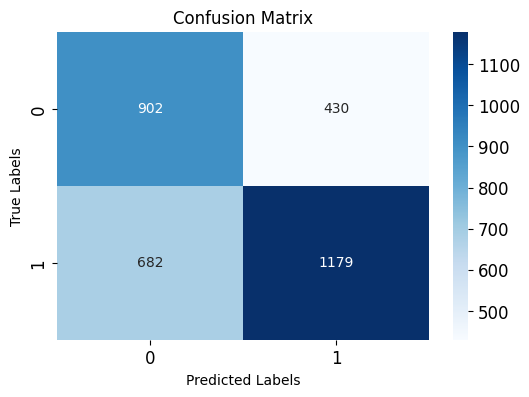

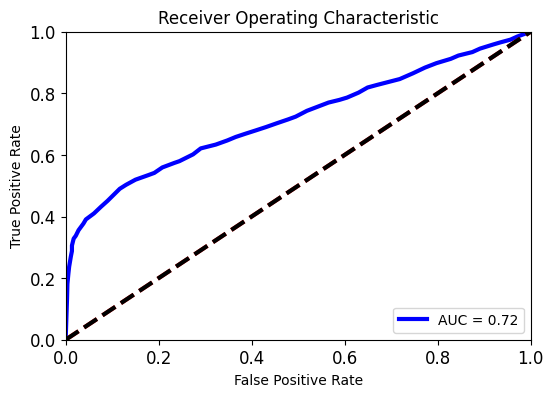

In [70]:
eval_classification(best_dt)
plot_confusion_matrix(best_dt)
plot_roc(best_dt)

#### Set Threshold

In [61]:
optimal_threshold(best_dt)

Optimal threshold: 0.60

Precision: 0.92
Recall: 0.51
F1-score: 0.66
TPR: 0.51
FPR: 0.07


In [62]:
table_threshold(best_dt)

,Threshold,Precision,Recall,F-Score,TPR,FPR
0,0.0,0.602424,1.000000,0.751891,1.000000,1.000000
1,0.1,0.603412,0.996479,0.751660,0.996479,0.992378
2,0.2,0.604402,0.994467,0.751854,0.994467,0.986280
3,0.3,0.607898,0.983400,0.751345,0.983400,0.961128
4,0.4,0.616623,0.944165,0.746025,0.944165,0.889482
5,0.5,0.903562,0.523139,0.662631,0.523139,0.084604
6,0.6,0.947170,0.505030,0.658793,0.505030,0.042683
7,0.7,0.964078,0.499497,0.658052,0.499497,0.028201
8,0.8,0.983623,0.483400,0.648229,0.483400,0.012195
9,0.9,0.986570,0.480382,0.646143,0.480382,0.009909


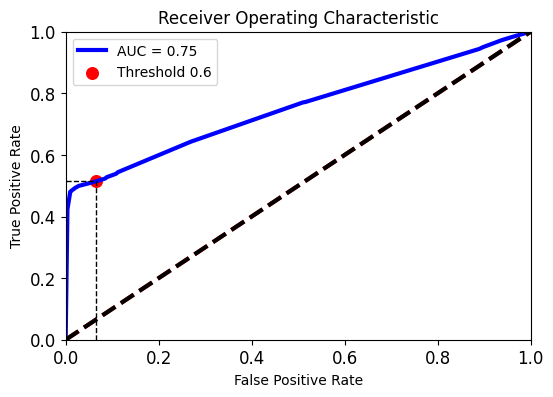

In [142]:
plot_roc_threshold_point(best_dt, 0.6)

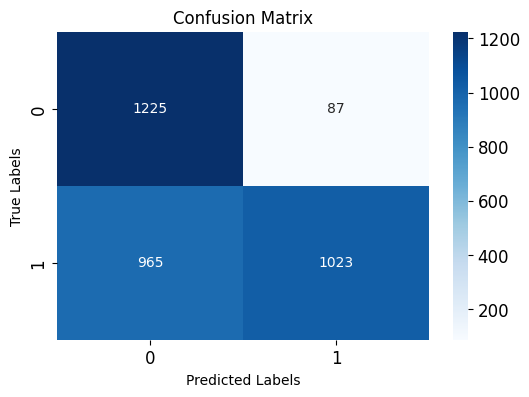

In [63]:
set_roc_threshold(best_dt, 0.6)

### **Random Forest**

model RandomForestClassifier()
Accuracy (Test Set): 0.65
Precision (Test Set): 0.72
Recall (Test Set): 0.66
F1-Score (Test Set): 0.69
ROC AUC (Test Set): 0.73
ROC AUC (Train Set): 1.00

Recall (Cross-validation Train): 1.00
Recall (Cross-validation Test): 0.66

Confusion Matrix (Test Set):
 [[ 841  491]
 [ 624 1237]]


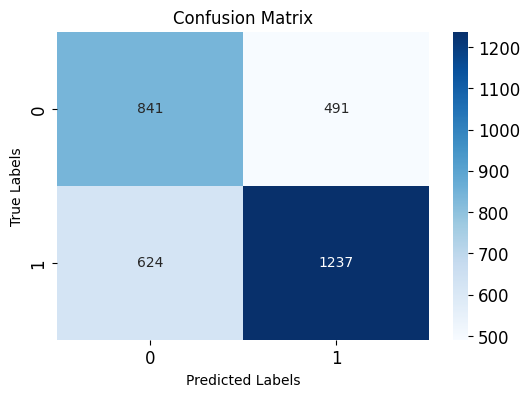

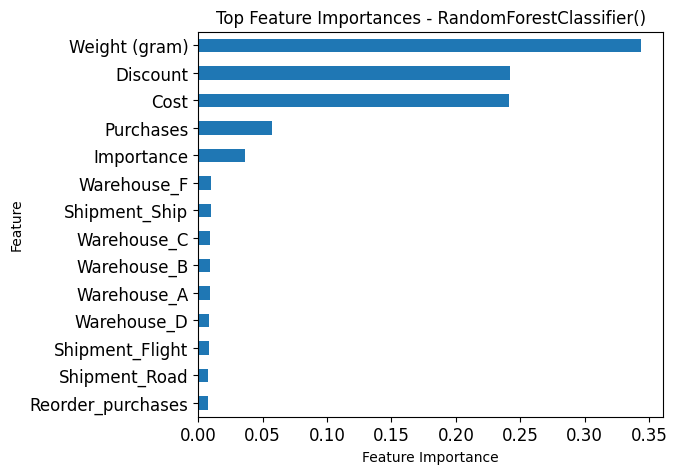

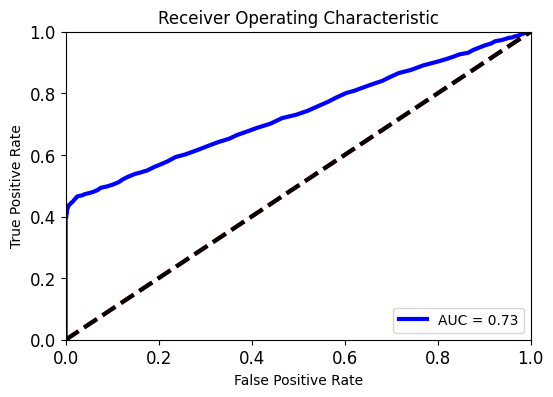

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
eval_classification(rf)
plot_confusion_matrix(rf)
plot_feature_importances(rf)
plot_roc(rf)

param value: 10; train: 0.9988633031363253; test: 0.7322567483193902
param value: 50; train: 1.0; test: 0.7356315145868514
param value: 100; train: 1.0; test: 0.7379019148275393
param value: 200; train: 1.0; test: 0.7374097824750738
param value: 300; train: 1.0; test: 0.7370527135619869
param value: 400; train: 1.0; test: 0.7373586282083633
param value: 500; train: 1.0; test: 0.7387962046364771


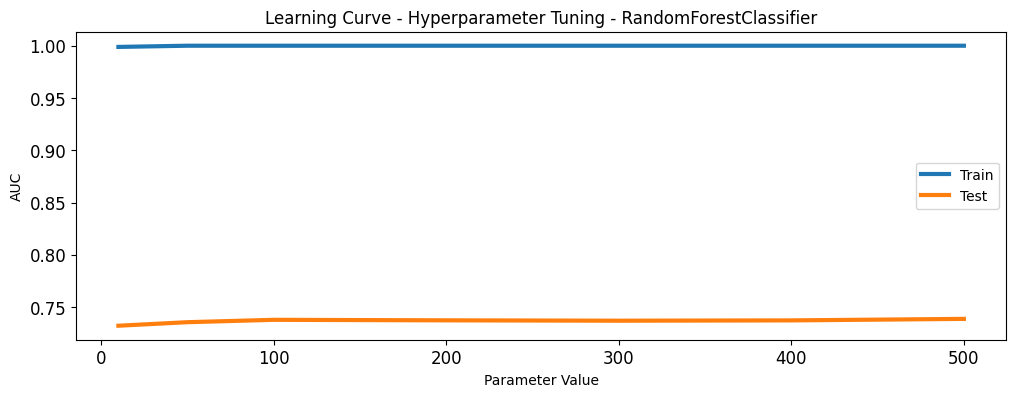

In [20]:
param_values_rf = [10, 50, 100, 200, 300, 400, 500]
draw_learning_curve('RandomForestClassifier', param_values_rf)


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf = RandomForestClassifier()

# Daftar hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [2],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5],
    'min_samples_split': [int(x) for x in np.linspace(2, 20, 10)],
    'min_samples_leaf': [int(x) for x in np.linspace(2, 20, 10)]
}

# Grid search dengan cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menggunakan model dengan hyperparameter terbaik
best_rf = grid_search.best_estimator_


/home/pijar2000/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/pijar2000/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/pijar2000/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/pijar2000/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 2}


/home/pijar2000/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/pijar2000/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/pijar2000/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/pijar2000/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [88]:
# Evaluasi model
y_pred_proba = best_rf.predict_proba(x_test)
test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("AUC :", test_auc)

AUC : 0.7394783956444353


Accuracy (Test Set): 0.66
Precision (Test Set): 0.76
Recall (Test Set): 0.61
F1-Score (Test Set): 0.67
ROC AUC (Test Set): 0.74
ROC AUC (Train Set): 0.74

Recall (Cross-validation Train): 0.60
Recall (Cross-validation Test): 0.59

Confusion Matrix (Test Set):
 [[ 971  361]
 [ 731 1130]]


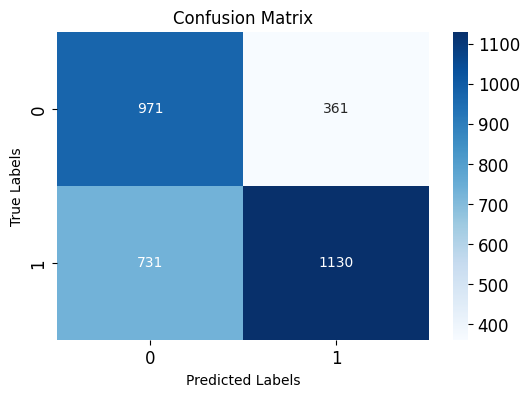

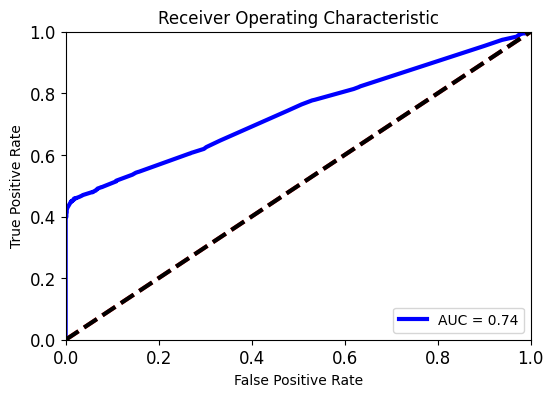

In [89]:
eval_classification(best_rf)
plot_confusion_matrix(best_rf)
plot_roc(best_rf)

#### Set Threshold

In [106]:
optimal_threshold(best_rf)


Optimal threshold RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=20, n_estimators=2): 0.51

Precision: 0.83
Recall: 0.50
F1-score: 0.63
TPR: 0.50
FPR: 0.15


In [109]:
table_threshold(best_rf)

,Threshold,Precision,Recall,F-Score,TPR,FPR
0,0.0,0.582837,1.000000,0.736446,1.000000,1.000000
1,0.1,0.582837,1.000000,0.736446,1.000000,1.000000
2,0.2,0.582837,1.000000,0.736446,1.000000,1.000000
3,0.3,0.583307,0.998925,0.736529,0.998925,0.996997
4,0.4,0.585900,0.991402,0.736527,0.991402,0.978979
5,0.5,0.805042,0.514777,0.627991,0.514777,0.174174
6,0.6,0.971033,0.414293,0.580791,0.414293,0.017267
7,0.7,0.989305,0.397636,0.567267,0.397636,0.006006
8,0.8,0.997241,0.388501,0.559165,0.388501,0.001502
9,0.9,1.000000,0.385277,0.556245,0.385277,0.000000


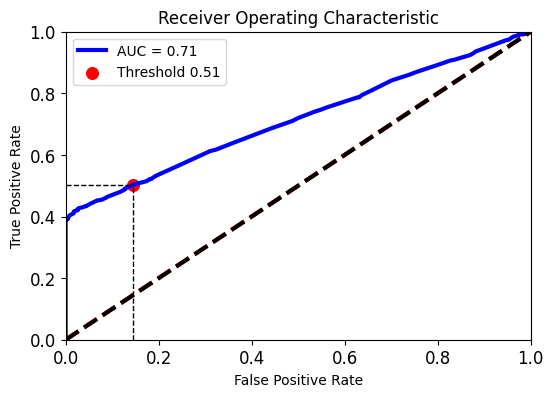

In [108]:
plot_roc_threshold_point(best_rf, 0.51)

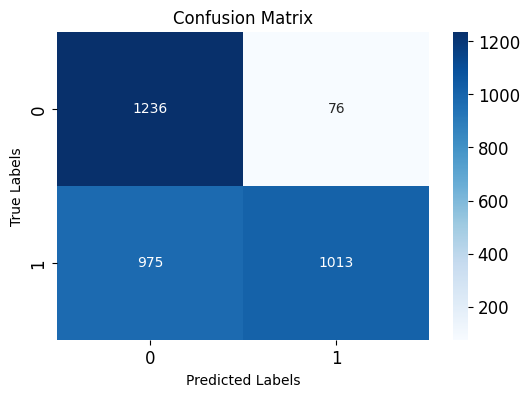

In [84]:
set_roc_threshold(best_rf, 0.56)

### Gradient Boosting Classifier

Accuracy (Test Set): 0.69
Precision (Test Set): 0.91
Recall (Test Set): 0.51
F1-Score (Test Set): 0.66
ROC AUC (Test Set): 0.75
ROC AUC (Train Set): 0.78

Recall (Cross-validation Train): 0.53
Recall (Cross-validation Test): 0.51

Confusion Matrix (Test Set):
 [[1237   95]
 [ 908  953]]


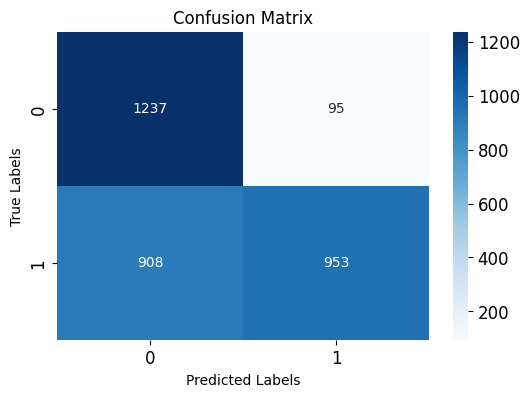

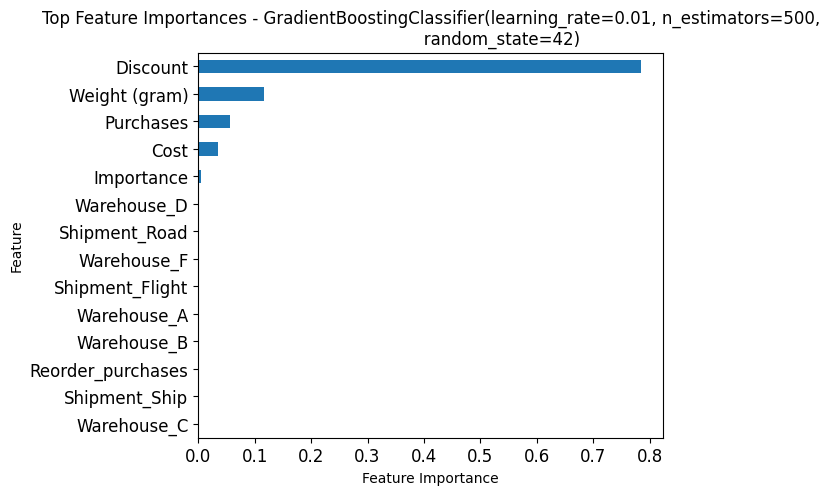

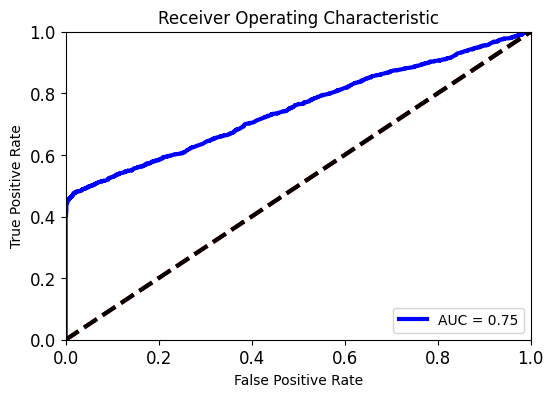

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    subsample=1.0,
    random_state=42
)
gbc.fit(x_train, y_train)
eval_classification(gbc)
plot_confusion_matrix(gbc)
plot_feature_importances(gbc)
plot_roc(gbc)

### Hypertuning

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting
gbc = GradientBoostingClassifier()

# Daftar hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search dengan cross-validation
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train_ravel)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menggunakan model dengan hyperparameter terbaik
best_gbc = grid_search.best_estimator_


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}


Accuracy (Test Set): 0.68
Precision (Test Set): 0.91
Recall (Test Set): 0.51
F1-Score (Test Set): 0.65
ROC AUC (Test Set): 0.75
ROC AUC (Train Set): 0.78

Recall (Cross-validation Train): 0.53
Recall (Cross-validation Test): 0.51

Confusion Matrix (Test Set):
 [[1238   94]
 [ 916  945]]


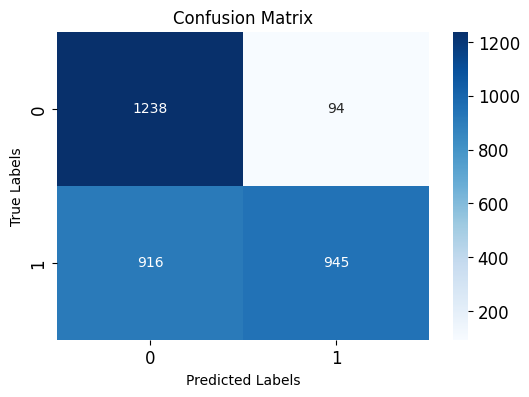

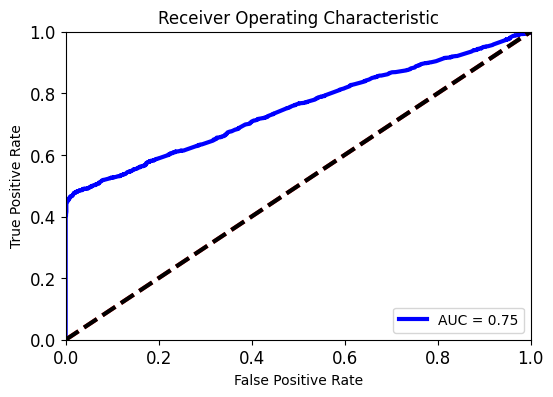

In [79]:
eval_classification(best_gbc)
plot_confusion_matrix(best_gbc)
plot_roc(best_gbc)

In [ ]:
table_threshold(best_gbc)

### XGboost

Accuracy (Test Set): 0.69
Precision (Test Set): 0.88
Recall (Test Set): 0.54
F1-Score (Test Set): 0.67
ROC AUC (Test Set): 0.75
ROC AUC (Train Set): 0.81

Recall (Cross-validation Train): 0.58
Recall (Cross-validation Test): 0.54

Confusion Matrix (Test Set):
 [[1191  141]
 [ 858 1003]]


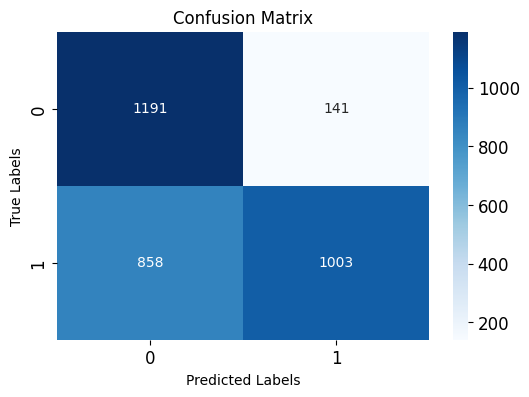

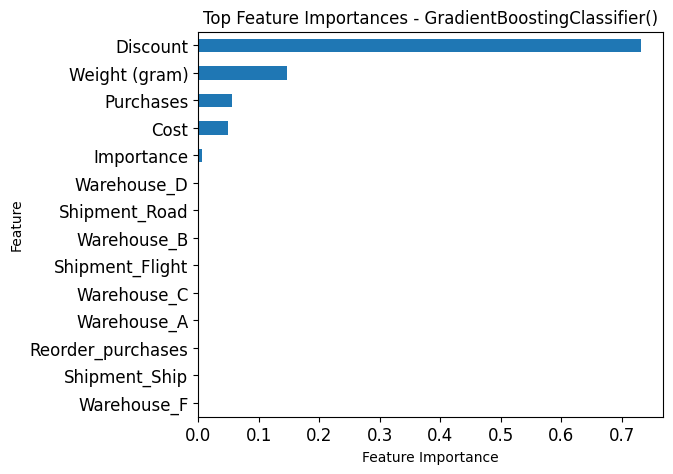

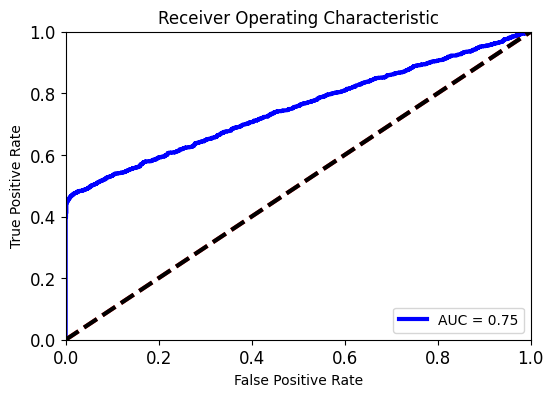

In [80]:
from xgboost import XGBClassifier

xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)
eval_classification(xgb)
plot_confusion_matrix(xgb)
plot_feature_importances(xgb)
plot_roc(xgb)

### Hypertuning

In [81]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Inisialisasi model XGBoost
xgb = XGBClassifier()

# Daftar hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'scale_pos_weight': [1, 3]
}

# Grid search dengan cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menggunakan model dengan hyperparameter terbaik
best_xgb = grid_search.best_estimator_


Best Hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 25, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'scale_pos_weight': 1, 'subsample': 1.0}


Accuracy (Test Set): 0.69
Precision (Test Set): 0.89
Recall (Test Set): 0.53
F1-Score (Test Set): 0.66
ROC AUC (Test Set): 0.75
ROC AUC (Train Set): 0.76

Recall (Cross-validation Train): 0.52
Recall (Cross-validation Test): 0.51

Confusion Matrix (Test Set):
 [[1211  121]
 [ 880  981]]


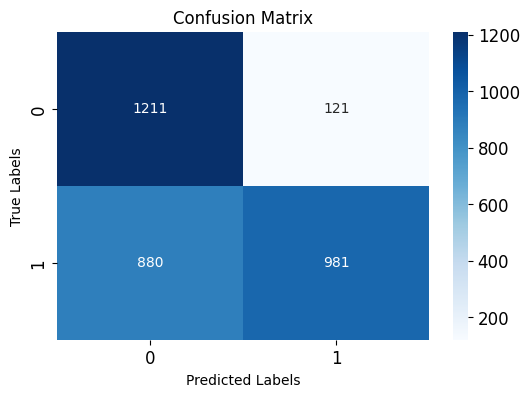

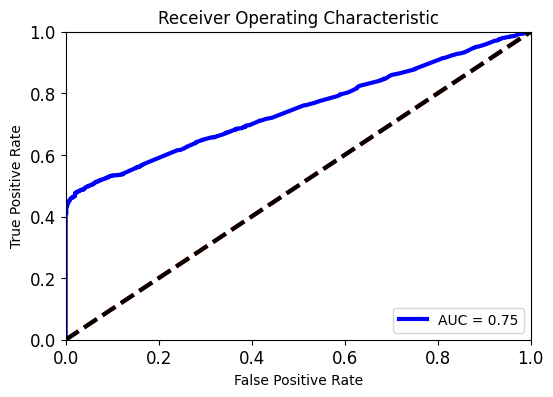

In [82]:
eval_classification(best_xgb)
plot_confusion_matrix(best_xgb)
plot_roc(best_xgb)

## Optimal Model

table

In [92]:
eval_classification(logreg)
eval_classification(best_dt)
eval_classification(best_rf)
eval_classification(best_gbc)
eval_classification(best_xgb)

model LogisticRegression()
Accuracy (Test Set): 0.64
Precision (Test Set): 0.69
Recall (Test Set): 0.69
F1-Score (Test Set): 0.69
ROC AUC (Test Set): 0.72
ROC AUC (Train Set): 0.71

Recall (Cross-validation Train): 0.68
Recall (Cross-validation Test): 0.68

Confusion Matrix (Test Set):
 [[ 755  577]
 [ 583 1278]]
model DecisionTreeClassifier(ccp_alpha=0, max_depth=79, max_features='sqrt',
                       min_samples_leaf=83, min_samples_split=100)
Accuracy (Test Set): 0.65
Precision (Test Set): 0.74
Recall (Test Set): 0.61
F1-Score (Test Set): 0.67
ROC AUC (Test Set): 0.72
ROC AUC (Train Set): 0.77

Recall (Cross-validation Train): 0.62
Recall (Cross-validation Test): 0.60

Confusion Matrix (Test Set):
 [[ 931  401]
 [ 722 1139]]
model RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=20, n_estimators=2)
Accuracy (Test Set): 0.66
Precision (Test Set): 0.76
Recall (Test Set): 0.61
F1-Score (Test Set): 0.67
ROC AU

- Random Forest menjadi model terbaik dengan nilai optimal threshold 0.56. Model ini memiliki nilai Precision, Recall, dan F1-score yang cukup tinggi, serta memiliki nilai True Positive Rate (TPR) yang relatif tinggi `0.51` dengan False Positive Rate (FPR) yang rendah `0.05`.

## **Business Insight**


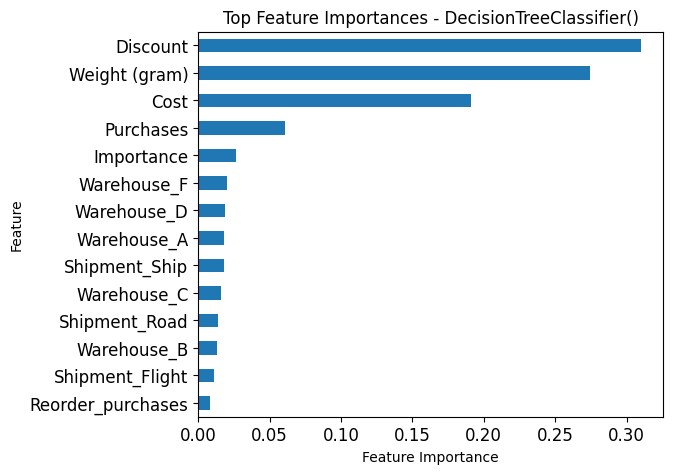

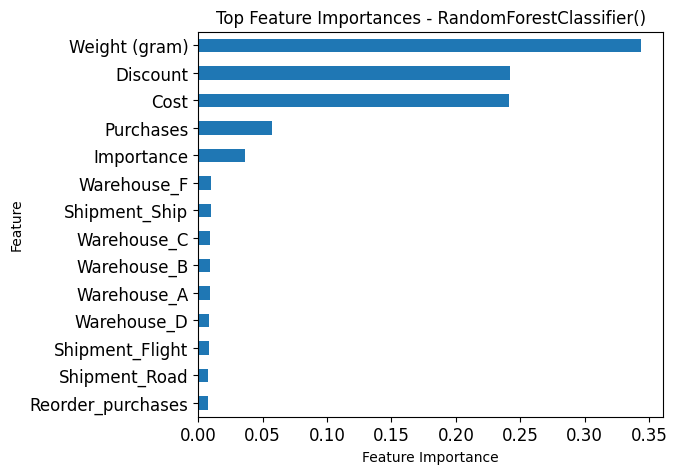

In [112]:
plot_feature_importances(dt)
plot_feature_importances(rf)

Fitur yang dapat dilihat dari model ini adalah 3 fitur utama yaitu `weight`, `discount`, dan `cost`

- `weight` menjadi penyumbang yang dominan dari keterlambatan suatu produk, sehingga pihak penyedia jasa memerlukan program khusus untuk mengkategorikan suatu produk dengan `weight` tertentu dan memasukannya ke dalam teknik pengiriman tertentu, sehingga barang yang memiliki `weight` berbeda bisa sampai tepat waktu.
- `cost` memiliki kontribusi yang cukup besar juga, disarankan membuat sebuah armada pengiriman yang menggolongkan barang berdasarkan kategori `cost` juga agar barang yang mempunyai `cost` tinggi maupun rendah mampu sampai tepat waktu.

## Extra Classifier Unsupervised

In [128]:
df = pd.read_csv('train_prototipe_2.csv')

df.sample(10)


,Cost,Purchases,Importance,Discount,Weight (gram),Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Reorder_purchases
5832,0.817757,0.166667,0,0.100000,0.612272,1.0,0,1,0,0,0,0,0,1,1
1109,0.775701,0.166667,1,0.750000,0.278013,1.0,1,0,0,0,0,0,0,1,1
8246,0.443925,0.333333,0,0.016667,0.610080,1.0,0,0,0,0,1,0,0,1,1
5330,0.359813,0.166667,0,0.050000,0.622936,1.0,0,1,0,0,0,1,0,0,1
4624,0.327103,0.000000,2,0.016667,0.520234,1.0,0,1,0,0,0,0,0,1,0
8046,0.710280,0.333333,0,0.083333,0.137765,1.0,0,0,0,0,1,1,0,0,1
9055,0.733645,0.166667,1,0.050000,0.618700,0.0,0,0,0,0,1,0,0,1,1
7702,0.658879,0.500000,0,0.016667,0.052009,1.0,0,0,0,0,1,0,0,1,1
2628,0.752336,0.000000,0,0.383333,0.164938,1.0,1,0,0,0,0,0,0,1,0
6434,0.261682,0.166667,1,0.033333,0.474653,1.0,0,0,0,0,1,1,0,0,1


### K-Means

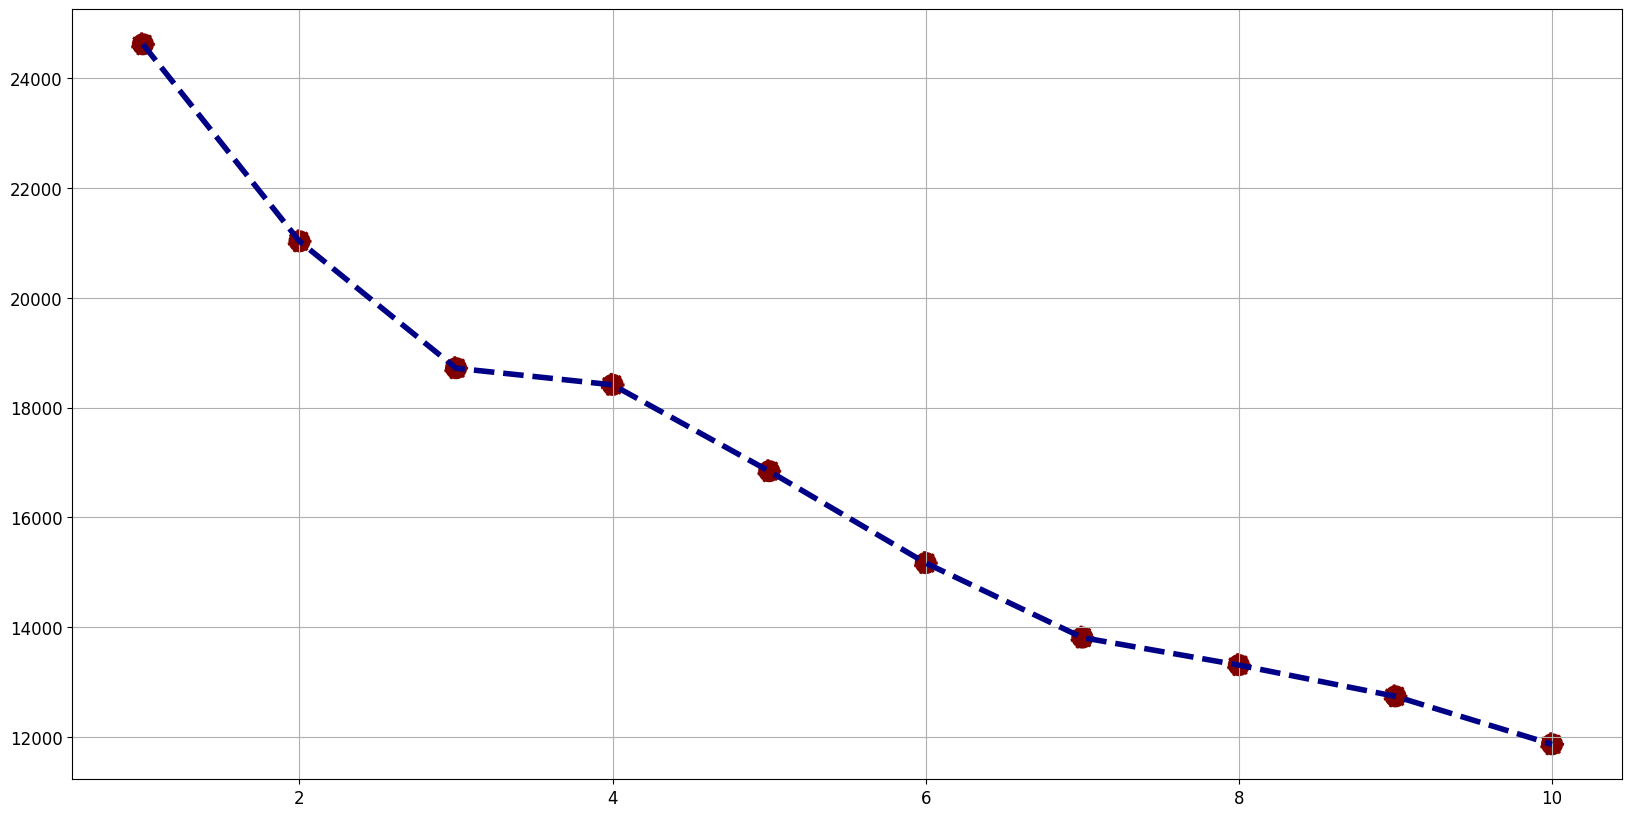

In [129]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth=4, linestyle='dashed')
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000', linestyle='dashed')
plt.grid(True)
plt.show()


In [130]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df.values)

KMeans(n_clusters=4, random_state=0)

In [131]:
df['cluster'] = kmeans.labels_
df.head()

,Cost,Purchases,Importance,Discount,Weight (gram),Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Reorder_purchases,cluster
0,0.378505,0.166667,0,0.716667,0.033893,1.0,0,0,0,1,0,1,0,0,1,2
1,0.560748,0.000000,0,0.966667,0.304894,1.0,0,0,0,0,1,1,0,0,0,2
2,0.406542,0.333333,0,0.783333,0.346676,1.0,1,0,0,0,0,1,0,0,1,2
3,0.373832,0.333333,1,0.150000,0.025712,1.0,0,1,0,0,0,1,0,0,1,2
4,0.411215,0.166667,1,0.750000,0.216654,1.0,0,0,1,0,0,1,0,0,1,2


In [132]:
df_raw=pd.read_csv('Data Raw.csv')

In [133]:
#pengelompokkan jenis feature
cat = ['Warehouse', 'Shipment', 'Importance', 'Gender'] 
num = ['Calls', 'Rating', 'Cost', 'Purchases', 'Discount', 'Weight (gram)', 'Late'] 

In [134]:
from scipy import stats

# Mencari nilai z-score untuk setiap nilai numerik dalam DataFrame
z_scores = np.abs(stats.zscore(df_raw[num]))

# Membuat mask untuk baris-baris yang mengandung outlier
outliers_mask = z_scores > 3

# Menghapus baris-baris yang mengandung outlier dari df_raw
df_cleaned = df_raw[~outliers_mask.any(axis=1)]

# Mereset indeks DataFrame
df_cleaned = df_cleaned.reset_index(drop=True)

# Menampilkan hasil
print("Jumlah outlier yang dihapus:")
print(outliers_mask.sum())

print(f'\nJumlah baris sebelum memfilter outlier: {len(df_raw)}')
print(f'Jumlah baris setelah memfilter outlier: {len(df_cleaned)}')


Jumlah outlier yang dihapus:
Calls              0
Rating             0
Cost               0
Purchases        178
Discount         181
Weight (gram)      0
Late               0
dtype: int64

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 10642


In [135]:
df_pca = df_cleaned.copy()
df_pca['cluster'] = kmeans.labels_

In [136]:
# Kolom-kolom yang ingin ditambahkan ke df_pca
columns_to_add = [
    'Importance', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C', 'Warehouse_D', 'Warehouse_F',
    'Shipment_Flight', 'Shipment_Road', 'Shipment_Ship', 'Reorder_purchases'
]

# Menambahkan kolom-kolom tersebut ke df_pca dengan sufiks '_other'
df_pca = df_pca.join(df[columns_to_add], rsuffix='_other')


In [137]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10642 entries, 0 to 10641
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 10642 non-null  int64 
 1   Warehouse          10642 non-null  object
 2   Shipment           10642 non-null  object
 3   Calls              10642 non-null  int64 
 4   Rating             10642 non-null  int64 
 5   Cost               10642 non-null  int64 
 6   Purchases          10642 non-null  int64 
 7   Importance         10642 non-null  object
 8   Gender             10642 non-null  object
 9   Discount           10642 non-null  int64 
 10  Weight (gram)      10642 non-null  int64 
 11  Late               10642 non-null  int64 
 12  cluster            10642 non-null  int32 
 13  Importance_other   10642 non-null  int64 
 14  Warehouse_A        10642 non-null  int64 
 15  Warehouse_B        10642 non-null  int64 
 16  Warehouse_C        10642 non-null  int64

In [138]:
df_pca = df_pca.select_dtypes(include=['int64', 'int32']).drop('ID', axis=1)

In [139]:
df_pca.sample(10)

,Calls,Rating,Cost,Purchases,Discount,Weight (gram),Late,cluster,Importance_other,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Reorder_purchases
1245,4,2,183,4,15,3632,1,0,0,1,0,0,0,0,0,0,1,1
10151,3,4,247,3,8,5792,0,3,1,0,0,1,0,0,0,0,1,1
515,5,4,245,5,6,3592,1,2,0,0,0,0,0,1,1,0,0,1
4353,2,5,186,2,10,4506,0,3,1,0,0,1,0,0,0,0,1,0
454,4,3,186,7,30,2062,1,3,1,0,0,1,0,0,0,0,1,1
7664,4,1,153,7,4,5761,1,3,1,0,1,0,0,0,0,0,1,1
313,4,3,140,3,46,1072,1,3,2,0,0,0,0,1,0,0,1,1
2674,3,5,152,2,6,1800,1,3,1,0,1,0,0,0,0,0,1,0
6770,3,1,198,2,8,4940,0,3,0,0,1,0,0,0,0,0,1,0
2803,4,4,260,2,17,3068,1,0,0,0,1,0,0,0,0,0,1,0


In [140]:
# one-hot encoding
importance_dummies = pd.get_dummies(df_pca['Importance_other'], prefix='Importance')

df_pca = pd.concat([df_pca, importance_dummies], axis=1)

df_pca = df_pca.drop('Importance_other', axis=1)


In [141]:
df_pca['Importance_0'] = df_pca['Importance_0'].astype(int)
df_pca['Importance_1'] = df_pca['Importance_1'].astype(int)
df_pca['Importance_2'] = df_pca['Importance_2'].astype(int)


In [142]:

df_pca = df_pca.rename(columns={'Importance_0': 'Importance_low', 'Importance_1': 'Importance_medium', 'Importance_2': 'Importance_high'})


In [143]:
df_pca

,Calls,Rating,Cost,Purchases,Discount,Weight (gram),Late,cluster,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Reorder_purchases,Importance_low,Importance_medium,Importance_high
0,4,2,177,3,44,1233,1,2,0,0,0,1,0,1,0,0,1,1,0,0
1,4,5,216,2,59,3088,1,2,0,0,0,0,1,1,0,0,0,1,0,0
2,2,2,183,4,48,3374,1,2,1,0,0,0,0,1,0,0,1,1,0,0
3,3,3,176,4,10,1177,1,2,0,1,0,0,0,1,0,0,1,0,1,0
4,2,2,184,3,46,2484,1,2,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10637,4,1,252,5,1,1538,1,3,1,0,0,0,0,0,0,1,1,0,1,0
10638,4,1,232,5,6,1247,0,3,0,1,0,0,0,0,0,1,1,0,1,0
10639,5,4,242,5,4,1155,0,3,0,0,1,0,0,0,0,1,1,1,0,0
10640,5,2,223,6,2,1210,0,3,0,0,0,0,1,0,0,1,1,0,1,0


In [153]:
df_pca.sort_values(by='Weight (gram)', ascending=False)

,Calls,Rating,Cost,Purchases,Discount,Weight (gram),Late,cluster,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Reorder_purchases,Importance_low,Importance_medium,Importance_high
188,2,2,154,3,38,7846,1,0,0,0,0,0,1,0,0,1,1,0,1,0
230,2,4,154,3,48,7684,1,0,0,0,0,0,1,0,0,1,1,0,1,0
187,2,3,142,3,38,7640,1,1,0,0,0,1,0,0,0,1,1,0,1,0
194,2,3,145,3,24,7588,1,0,0,0,0,0,1,0,0,1,1,0,1,0
202,2,5,160,3,31,7401,1,3,0,1,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,6,1,303,4,10,1003,0,3,0,0,0,0,1,0,0,1,1,0,1,0
5998,5,2,254,5,6,1002,0,2,0,0,0,0,1,0,1,0,1,0,1,0
2461,4,4,151,2,38,1001,1,0,0,0,0,0,1,0,0,1,0,1,0,0
5748,5,3,260,5,8,1001,0,2,0,1,0,0,0,1,0,0,1,0,1,0


In [163]:
df_pca.groupby('cluster').agg(['mean', 'median'])


Calls           Rating               Cost        Purchases         \
             mean median      mean median        mean median      mean median   
cluster                                                                         
0        4.076570    4.0  3.029993    3.0  210.103035  214.0  3.427664    3.0   
1        4.034110    4.0  3.006656    3.0  211.886023  219.0  3.518303    3.0   
2        4.095307    4.0  2.988050    3.0  210.300495  216.0  3.468085    3.0   
3        4.035906    4.0  2.947402    3.0  210.808504  214.0  3.469606    3.0   

          Discount         ... Shipment_Ship        Reorder_purchases         \
              mean median  ...          mean median              mean median   
cluster                    ...                                                 
0        15.390967    8.0  ...           1.0    1.0          0.751941    1.0   
1        12.277870    7.0  ...           1.0    1.0          0.782030    1.0   
2        12.424075    7.0  ...           0.0    0.0          0.763043    1.0   
3        10.181732    6.0  ...           1.0    1.0          0.756850    1.0   

        Importance_low        Importance_medium        Importance_high         
                  mean median              mean median            mean median  
cluster                                                                        
0             0.781228    1.0          0.218772    0.0        0.000000    0.0  
1             0.482529    0.0          0.427621    0.0        0.089850    0.0  
2             0.484407    0.0          0.427864    0.0        0.087730    0.0  
3             0.225827    0.0          0.625197    1.0        0.148976    0.0  

[4 rows x 38 columns]

In [158]:
print(df_pca.groupby('cluster').describe().stack(level=0).loc[:, ['25%', '50%', '75%']])




                            25%     50%     75%
cluster                                        
0       Calls               3.0     4.0     5.0
        Cost              168.0   214.0   252.0
        Discount            4.0     8.0    21.0
        Importance_high     0.0     0.0     0.0
        Importance_low      1.0     1.0     1.0
...                         ...     ...     ...
3       Warehouse_B         0.0     0.0     1.0
        Warehouse_C         0.0     0.0     1.0
        Warehouse_D         0.0     0.0     0.0
        Warehouse_F         0.0     0.0     0.0
        Weight (gram)    2024.5  4439.0  5248.0

[76 rows x 3 columns]


In [146]:
df_pca.groupby('cluster').agg(lambda x: x.eq(1).sum())


,Calls,Rating,Cost,Purchases,Discount,Weight (gram),Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Reorder_purchases,Importance_low,Importance_medium,Importance_high
cluster,,,,,,,,,,,,,,,,,,,
0,0,559,0,0,180,0,2337,363,336,350,0,1785,0,0,2834,2131,2214,620,0
1,0,243,0,0,100,0,710,0,0,0,1202,0,0,0,1202,940,580,514,108
2,0,706,0,0,254,0,2024,574,577,571,575,1134,1728,1703,0,2618,1662,1468,301
3,0,653,0,0,275,0,1211,840,865,850,0,620,0,0,3175,2403,717,1985,473


In [147]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df)
pcs = pca.transform(df)

In [148]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = df['cluster']
data_pca.sample(5)

,PC 1,PC 2,cluster
210,0.377115,1.479179,1
7996,1.908468,0.045614,0
2928,-0.290243,-0.877937,2
3364,-1.349761,0.312128,3
10283,-1.234664,-0.730235,3


In [149]:
import matplotlib.pyplot as plt

def plot_clusters(data_pca):
    color_list = ['red', 'blue', 'green', 'orange', 'purple', 'pink']

    plt.figure(figsize=(15, 10))
    for i, cluster in enumerate(data_pca['cluster'].unique()):
        df_cluster = data_pca[data_pca['cluster'] == cluster]
        plt.scatter(df_cluster['PC 1'], df_cluster['PC 2'], c=color_list[i], s=5, label=f'Cluster {cluster}')
        # Centroid positions
        plt.scatter(df_cluster['PC 1'].mean(), df_cluster['PC 2'].mean(), c=color_list[i], marker='X', edgecolor='k', s=250, zorder=10)

    plt.legend()
    plt.title('PCA Scatter Plot with Clusters')
    plt.xlabel('PC 1', fontsize=14)
    plt.ylabel('PC 2', fontsize=14)
    plt.show()



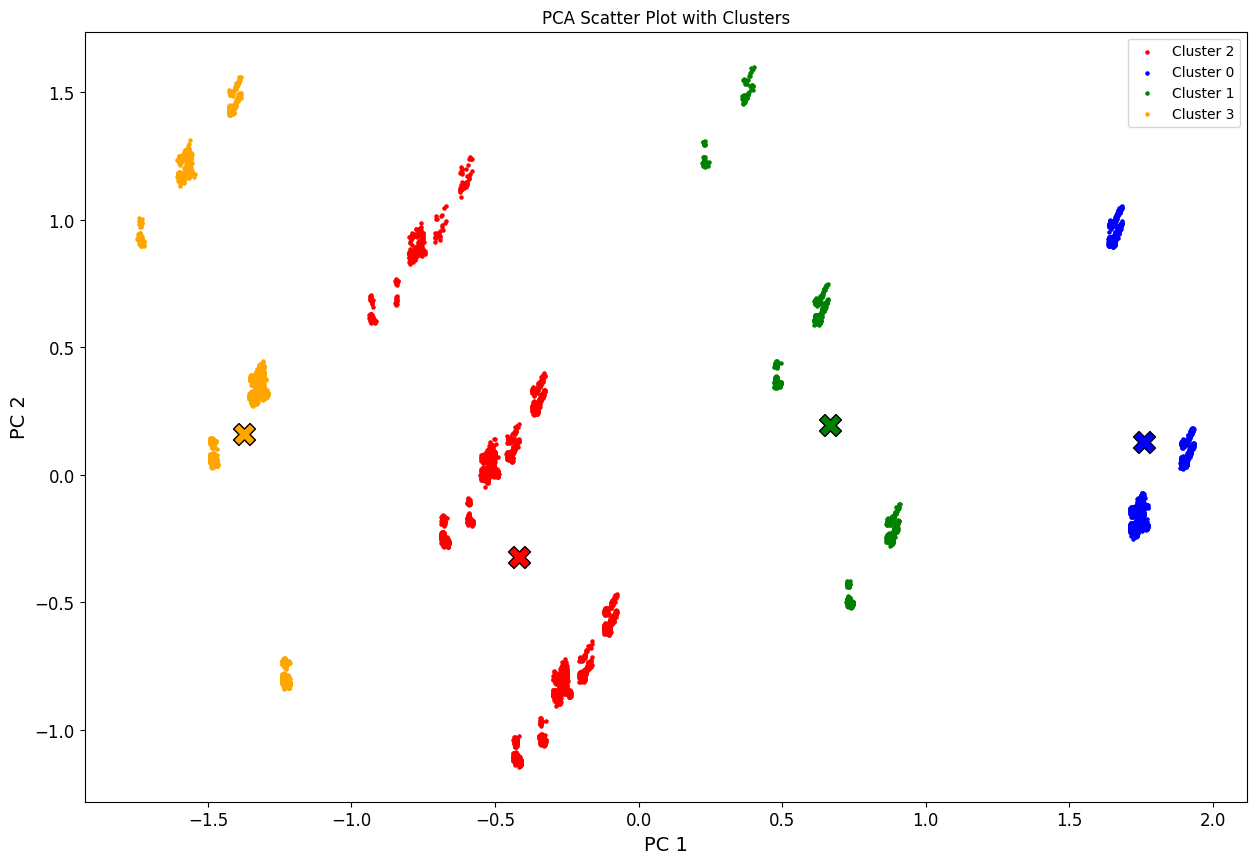

In [150]:
plot_clusters(data_pca)

In [159]:
aggregated_df = df_pca.groupby('cluster').describe().stack(level=0).loc[:, ['25%', '50%', '75%']]

aggregated_df.to_csv('pca_clustering_data.csv')

In [152]:
count_aggdf = df_pca.groupby('cluster').agg(lambda x: x.eq(1).sum())

count_aggdf.to_csv('pca_clustering_data_count.csv')

In [156]:
count_aggdf = df_pca.groupby('cluster').agg(lambda x: x.eq(1).sum())
total_count = df_pca.groupby('cluster').size()
ratio_df = count_aggdf.div(total_count, axis=0)


ratio_df.to_csv('pca_clustering_data_count_ratio.csv')

In [164]:
mean_pca = df_pca.groupby('cluster').agg(['mean', 'median'])

mean_pca.to_csv('mean_pca.csv')